In [3]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:

purchase_table = pd.read_csv('QVI_purchase_behaviour.csv')

transaction_table =  pd.read_excel('QVI_transaction_data.xlsx')
purchase_table.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_table.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
#EDA 
print(purchase_table.dtypes)
print(transaction_table.dtypes)
#We see here that date is an int64 type which isnt ideal so we make a new column in datetime format
origin_date = '1899-12-30'
transaction_table['datetime'] = pd.to_datetime(transaction_table['DATE'], unit = 'D', origin = origin_date)
transaction_table

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,datetime
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27


In [7]:
#Analyze prod_name column
print(transaction_table['PROD_NAME'].describe())

unique_products = transaction_table['PROD_NAME'].unique()

product_words = [word for prod in unique_products for word in prod.split()]

# Remove words with digits or special characters
filtered_words = [word for word in product_words if re.match("^[A-Za-z]+$", word)]

# Count word frequency
word_counts = Counter(filtered_words)

# Sort words by frequency (highest to lowest)
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for display
word_freq_df = pd.DataFrame(sorted_words, columns=['Word', 'Frequency'])

print(word_freq_df)
print(word_freq_df['Word'])


count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object
          Word  Frequency
0        Chips         21
1       Smiths         16
2      Crinkle         14
3          Cut         14
4       Kettle         13
..         ...        ...
163        Rst          1
164       Pork          1
165      Belly          1
166         Pc          1
167  Bolognese          1

[168 rows x 2 columns]
0          Chips
1         Smiths
2        Crinkle
3            Cut
4         Kettle
         ...    
163          Rst
164         Pork
165        Belly
166           Pc
167    Bolognese
Name: Word, Length: 168, dtype: object


In [8]:
#We need to remove the salsas and then look at some statistics
transaction_table = transaction_table[~transaction_table['PROD_NAME'].str.lower().str.contains('salsa')]
transaction_table.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,datetime
count,246742.000000,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742
mean,43464.054875,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,2018-12-30 01:19:01.211467520
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018-07-01 00:00:00
25%,43373.000000,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,2018-09-30 00:00:00
50%,43464.000000,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,2018-12-30 00:00:00
75%,43555.000000,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,2019-03-31 00:00:00
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019-06-30 00:00:00
std,105.396691,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,NaN


In [9]:
#Transactions where PROD_QTY is 200
transaction_table[transaction_table['PROD_QTY'] == 200]

customer_id_200 = transaction_table[transaction_table['PROD_QTY'] == 200]['LYLTY_CARD_NBR'].unique()[0]

transaction_table[transaction_table['LYLTY_CARD_NBR'] == customer_id_200]

#We see only two transactions so we remove them

transaction_table = transaction_table[transaction_table['LYLTY_CARD_NBR'] != customer_id_200]

transaction_table.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,datetime
count,246740.000000,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740
mean,43464.054843,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,2018-12-30 01:18:58.448569344
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018-07-01 00:00:00
25%,43373.000000,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,2018-09-30 00:00:00
50%,43464.000000,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,2018-12-30 00:00:00
75%,43555.000000,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,2019-03-31 00:00:00
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,2019-06-30 00:00:00
std,105.396396,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,NaN


In [10]:
transactions_by_day = transaction_table.groupby('datetime').size().reset_index(name='N')

# Create full date range
full_date_range = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')})

# Merge with transaction data to find missing dates
transactions_by_day = full_date_range.merge(transactions_by_day, left_on='DATE', how='left', right_on = 'datetime').fillna(0)
transactions_by_day

,DATE,datetime,N
0,2018-07-01,2018-07-01 00:00:00,663.0
1,2018-07-02,2018-07-02 00:00:00,650.0
2,2018-07-03,2018-07-03 00:00:00,674.0
3,2018-07-04,2018-07-04 00:00:00,669.0
4,2018-07-05,2018-07-05 00:00:00,660.0
...,...,...,...
360,2019-06-26,2019-06-26 00:00:00,657.0
361,2019-06-27,2019-06-27 00:00:00,669.0
362,2019-06-28,2019-06-28 00:00:00,673.0
363,2019-06-29,2019-06-29 00:00:00,703.0


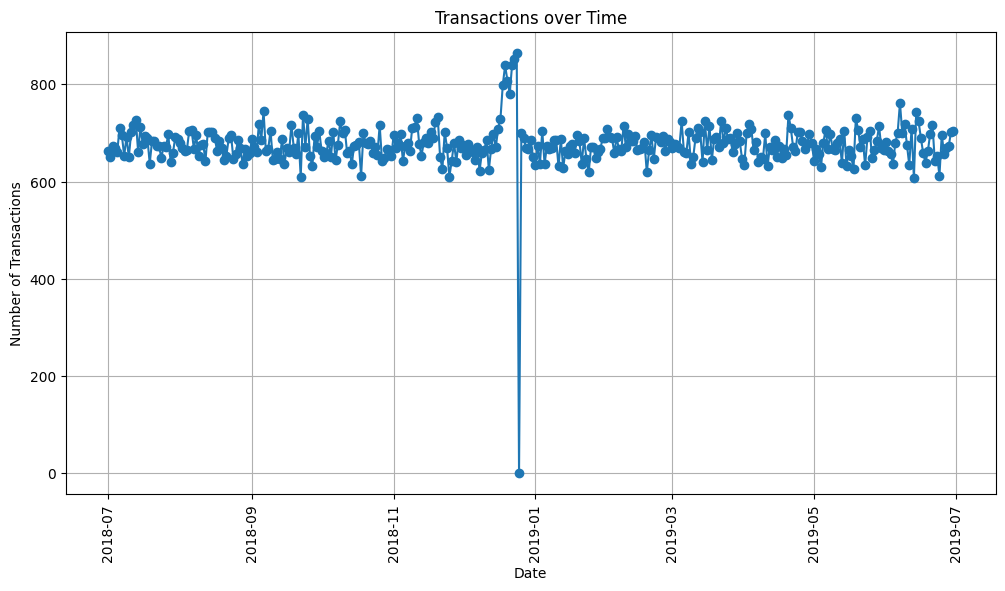

In [11]:
# Plot transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions over Time')
plt.xticks(rotation=90)
plt.grid()
plt.show()

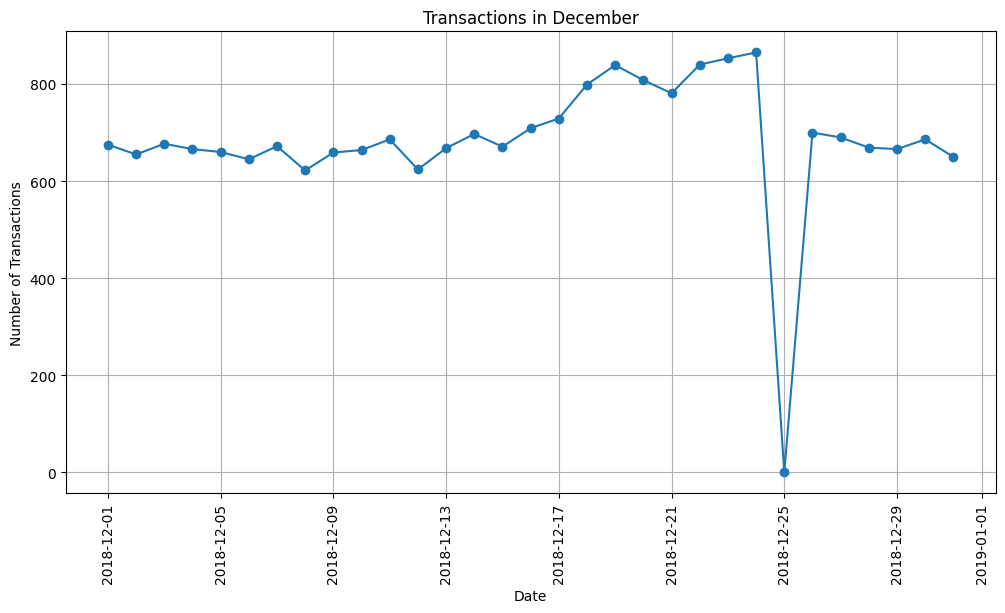

In [12]:
# Zoom in on December
december_data = transactions_by_day[(transactions_by_day['DATE'] >= '2018-12-01') & (transactions_by_day['DATE'] <= '2018-12-31')]
plt.figure(figsize=(12, 6))
plt.plot(december_data['DATE'], december_data['N'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions in December')
plt.xticks(rotation=90)
plt.grid()
plt.show()


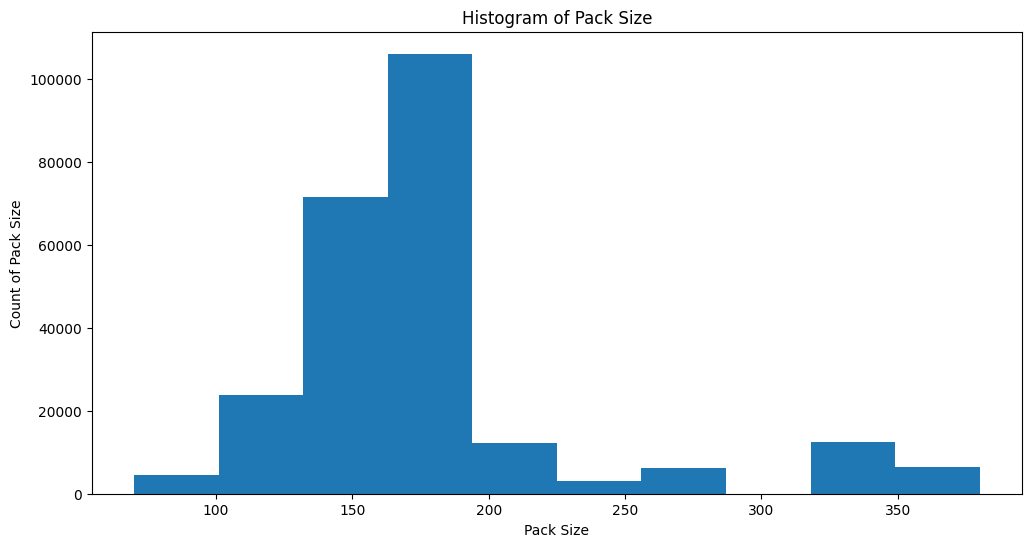

In [13]:
#Pack size analysis
transaction_table['PACK_SIZE'] = transaction_table['PROD_NAME'].str.extract('(\d+)', expand = False).astype('int')
plt.figure(figsize=(12, 6))
plt.hist(transaction_table['PACK_SIZE'])
plt.xlabel('Pack Size')
plt.ylabel('Count of Pack Size')
plt.title('Histogram of Pack Size')
plt.show()

In [14]:
#Creating Chip_NAMES column
transaction_table['CHIP_NAMES'] = transaction_table['PROD_NAME'].str.split().str[0]
chip_name_mapping = {
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'GrnWves': 'Grain Waves',
    'WW': 'Woolworths',
    'Snbts': 'Sunbites',
    'RRD': 'Red Rock Deli',
    'Red': 'Red Rock Deli',
    'Smith': 'Smiths',
    'French': 'French Fries'
}

transaction_table['CHIP_NAMES'] = transaction_table['CHIP_NAMES'].replace(chip_name_mapping)
transaction_table

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,datetime,PACK_SIZE,CHIP_NAMES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,175,Kettle
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,175,Tostitos
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,170,Doritos
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,150,Doritos


In [15]:
#Merging for new analysis

merged_table = transaction_table.merge(right = purchase_table, on = 'LYLTY_CARD_NBR', how = 'left')
merged_table.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,datetime,PACK_SIZE,CHIP_NAMES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [16]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  int64         
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   datetime          246740 non-null  datetime64[ns]
 9   PACK_SIZE         246740 non-null  int32         
 10  CHIP_NAMES        246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), objec

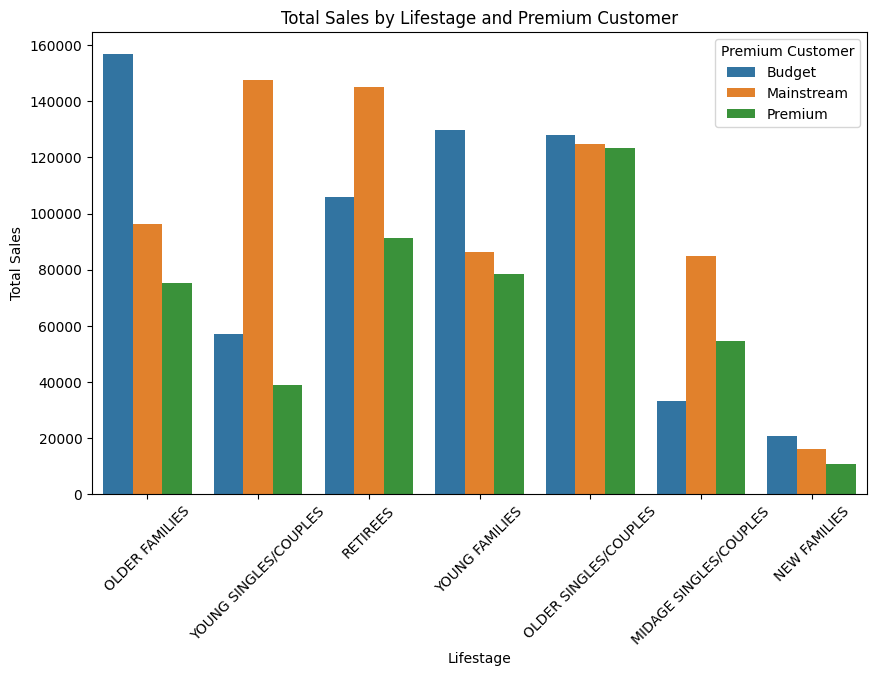

In [17]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and sum total sales
sales_summary = merged_table.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

# Sort values for better visualization
sales_summary = sales_summary.sort_values("TOT_SALES", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_summary, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.title("Total Sales by Lifestage and Premium Customer")
plt.legend(title="Premium Customer")
plt.show()

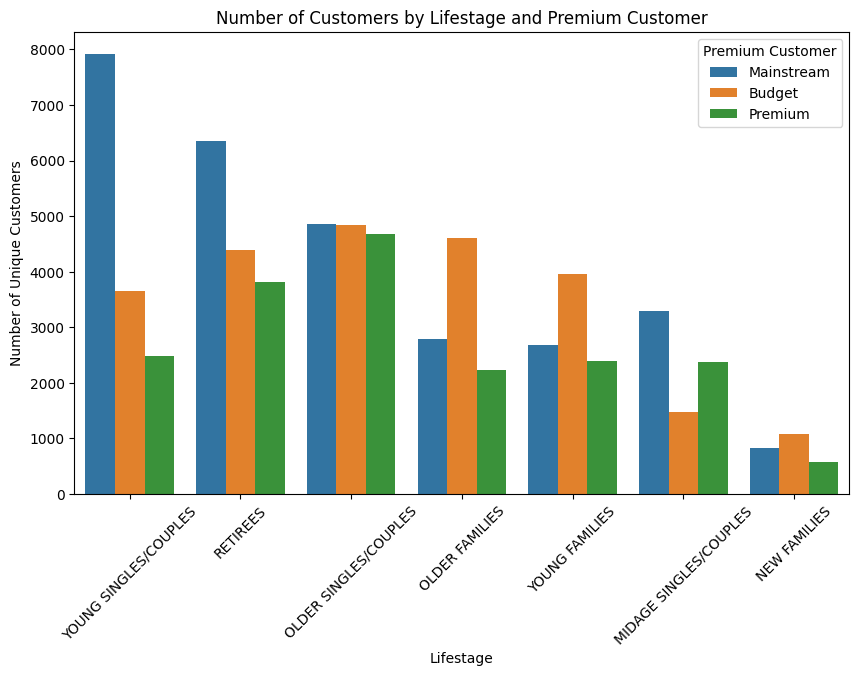

In [18]:
# Count unique customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_summary = merged_table.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().reset_index()

# Rename the column for clarity
customer_summary.rename(columns={"LYLTY_CARD_NBR": "NUM_CUSTOMERS"}, inplace=True)

# Sort values for better visualization
customer_summary = customer_summary.sort_values("NUM_CUSTOMERS", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=customer_summary, x="LIFESTAGE", y="NUM_CUSTOMERS", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Number of Unique Customers")
plt.title("Number of Customers by Lifestage and Premium Customer")
plt.legend(title="Premium Customer")
plt.show()

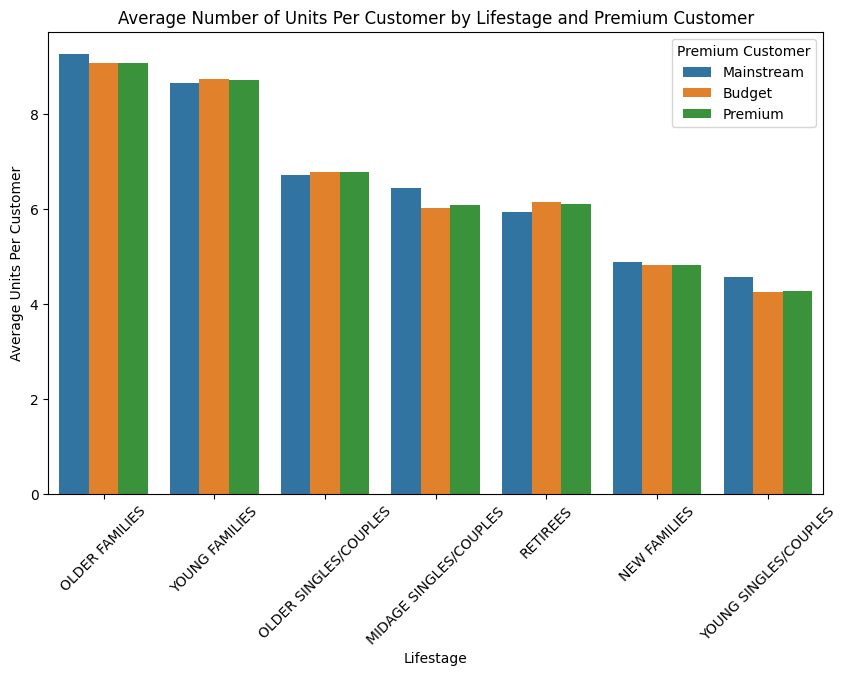

In [19]:
# Calculate total units bought per segment
units_per_segment = merged_table.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum().reset_index()

# Count unique customers per segment
customers_per_segment = merged_table.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().reset_index()

# Merge both DataFrames to calculate the average units per customer
avg_units_per_customer = pd.merge(units_per_segment, customers_per_segment, on=["LIFESTAGE", "PREMIUM_CUSTOMER"])
avg_units_per_customer["AVG_UNITS_PER_CUSTOMER"] = avg_units_per_customer["PROD_QTY"] / avg_units_per_customer["LYLTY_CARD_NBR"]

# Sort values for better visualization
avg_units_per_customer = avg_units_per_customer.sort_values("AVG_UNITS_PER_CUSTOMER", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_units_per_customer, x="LIFESTAGE", y="AVG_UNITS_PER_CUSTOMER", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Average Units Per Customer")
plt.title("Average Number of Units Per Customer by Lifestage and Premium Customer")
plt.legend(title="Premium Customer")
plt.show()

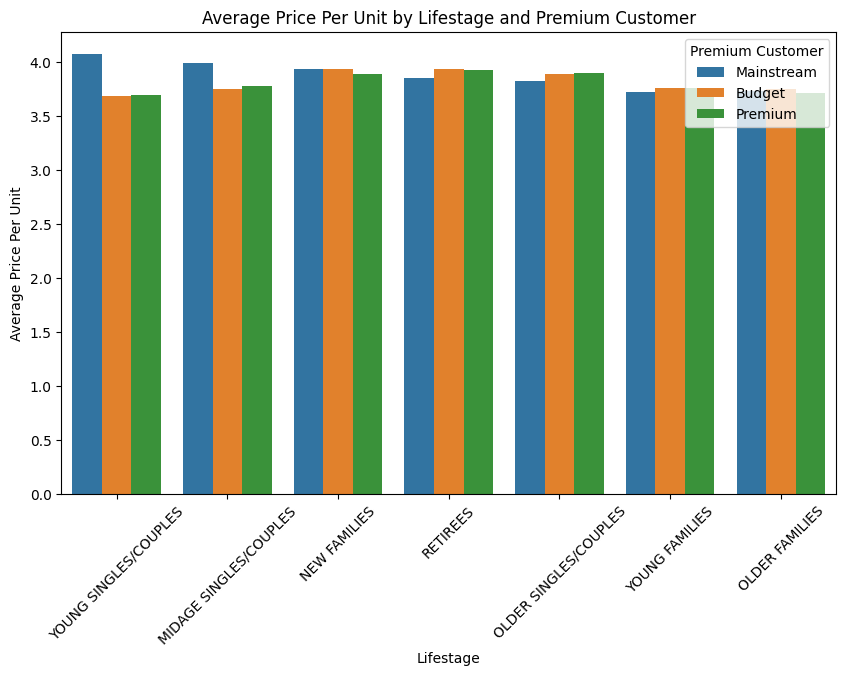

In [20]:
# Calculate total sales and total quantity per segment
sales_and_qty = merged_table.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])[["TOT_SALES", "PROD_QTY"]].sum().reset_index()

# Calculate the average price per unit by dividing total sales by total quantity
sales_and_qty["AVG_PRICE_PER_UNIT"] = sales_and_qty["TOT_SALES"] / sales_and_qty["PROD_QTY"]

# Sort values for better visualization
sales_and_qty = sales_and_qty.sort_values("AVG_PRICE_PER_UNIT", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_and_qty, x="LIFESTAGE", y="AVG_PRICE_PER_UNIT", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Average Price Per Unit")
plt.title("Average Price Per Unit by Lifestage and Premium Customer")
plt.legend(title="Premium Customer")
plt.show()

In [21]:
# Subset data for Premium vs Mainstream
premium_vs_mainstream = sales_and_qty[sales_and_qty["PREMIUM_CUSTOMER"].isin(["Premium", "Mainstream"])]

# Extract price per unit for Premium and Mainstream
premium_group = premium_vs_mainstream[premium_vs_mainstream["PREMIUM_CUSTOMER"] == "Premium"]["AVG_PRICE_PER_UNIT"]
mainstream_group = premium_vs_mainstream[premium_vs_mainstream["PREMIUM_CUSTOMER"] == "Mainstream"]["AVG_PRICE_PER_UNIT"]

# Subset data for Budget vs Midage & Young Singles/Couples
budget_vs_midage_young = sales_and_qty[sales_and_qty["PREMIUM_CUSTOMER"] == "Budget"]

# Extract price per unit for Budget and Midage & Young Singles/Couples
budget_group = budget_vs_midage_young["AVG_PRICE_PER_UNIT"]

midage_young_group = sales_and_qty[sales_and_qty["LIFESTAGE"].isin(["MIDAGE SINGLES/COUPLES", "YOUNG SINGLES/COUPLES"])]["AVG_PRICE_PER_UNIT"]

# Perform t-test for Premium vs Mainstream
t_stat, p_value = stats.ttest_ind(premium_group, mainstream_group)
print(f"T-test (Premium vs Mainstream) - T-statistic: {t_stat}, P-value: {p_value}")

# Perform t-test for Budget vs Midage & Young Singles/Couples
t_stat_budget, p_value_budget = stats.ttest_ind(budget_group, midage_young_group)
print(f"T-test (Budget vs Midage & Young Singles/Couples) - T-statistic: {t_stat_budget}, P-value: {p_value_budget}")

T-test (Premium vs Mainstream) - T-statistic: -1.1281726310241889, P-value: 0.28129823054712483
T-test (Budget vs Midage & Young Singles/Couples) - T-statistic: -0.21266238259446066, P-value: 0.8354799450577395
